In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# import imblearn
%matplotlib inline

import os
import glob

from IPython import display

### Upload data

In [2]:
path = r'C:\Users\Public\Documents\HRS\Features new'

In [3]:
el_3peaks = pd.read_csv(path + '\Feature matrix EL no noise 3 peaks.csv', index_col=0)
el_4peaks = pd.read_csv(path + '\Feature matrix EL no noise 4 peaks.csv', index_col=0)
el_5peaks = pd.read_csv(path + '\Feature matrix EL no noise 5 peaks.csv', index_col=0)
el_om_3peaks = pd.read_csv(path + '\Feature matrix EL+OM no noise 3 peaks.csv', index_col=0)
el_om_4peaks = pd.read_csv(path + '\Feature matrix EL+OM no noise 4 peaks.csv', index_col=0)
el_om_5peaks = pd.read_csv(path + '\Feature matrix EL+OM no noise 5 peaks.csv', index_col=0)

# Electrode and electrode+optical with 3 peaks

## Analysis

In [4]:
data1 = el_3peaks
data2 = el_om_3peaks
data1.drop(['Label for OM and EL'], axis=1, inplace=True)
print(data1.shape, data2.shape)

(840, 16) (260, 31)


In [5]:
data1.head()

,#peaks_0.05,#peaks_0.1,freq 0,freq 1,freq 2,height 0,height 1,height 2,width 0,width 1,width 2,prominence 0,prominence 1,prominence 2,second harmonics,target
0,47,37,16.333333,14.583333,16.500000,0.009280,0.008940,0.008834,5.326312,1.064753,0.981352,0.008569,0.006659,0.003046,0,1.0
1,46,30,12.833333,12.000000,11.083333,0.014327,0.012430,0.011112,1.334530,2.196597,1.186796,0.013816,0.011466,0.009563,0,1.0
2,39,26,15.500000,17.000000,14.583333,0.009945,0.009912,0.009245,2.896952,1.228006,1.379949,0.009681,0.008403,0.008812,0,1.0
3,46,26,17.000000,16.166667,15.500000,0.020191,0.017435,0.017393,2.095364,1.793380,1.461269,0.019618,0.013007,0.013488,0,1.0
4,4,2,8.487334,16.851663,1.722068,0.013458,0.008602,0.004335,2.110823,1.347647,6.265876,0.013258,0.008540,0.004109,1,1.0


In [6]:
data2.head()

,#peaks_0.05,#peaks_0.1,freq 0,freq 1,freq 2,height 0,height 1,height 2,width 0,width 1,...,height 1.1,height 2.1,width 0.1,width 1.1,width 2.1,prominence 0.1,prominence 1.1,prominence 2.1,second harmonics.1,target
0,47,37,16.333333,14.583333,16.500000,0.009280,0.008940,0.008834,5.326312,1.064753,...,2.204391,2.162598,1.955503,3.729878,2.908898,5.243227,2.143604,1.458629,0,1.0
1,46,30,12.833333,12.000000,11.083333,0.014327,0.012430,0.011112,1.334530,2.196597,...,2.822821,2.270038,5.120580,1.921958,1.094528,2.795025,2.646417,1.873394,0,1.0
2,39,26,15.500000,17.000000,14.583333,0.009945,0.009912,0.009245,2.896952,1.228006,...,2.800142,2.068655,2.301846,2.144784,0.939523,3.846819,2.374472,1.151317,0,1.0
3,46,26,17.000000,16.166667,15.500000,0.020191,0.017435,0.017393,2.095364,1.793380,...,2.486829,2.246315,2.599745,2.415657,1.347069,2.804974,2.277239,1.485936,0,1.0
4,4,2,8.487334,16.851663,1.722068,0.013458,0.008602,0.004335,2.110823,1.347647,...,3.315860,2.178117,2.450946,2.342132,0.763458,10.318862,3.270278,0.785858,1,1.0


In [15]:
print(data1['target'].value_counts())
print('\n')
print(data2['target'].value_counts())

0.0    784
1.0     56
Name: target, dtype: int64


0.0    211
1.0     49
Name: target, dtype: int64


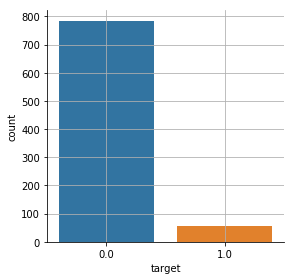

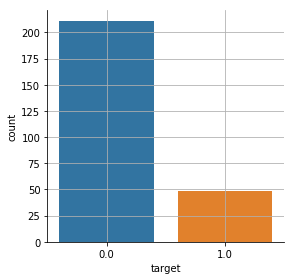

In [21]:
sns.factorplot('target', data = data1, kind="count")
plt.grid()
sns.factorplot('target', data = data2, kind="count")
plt.grid()
plt.show()

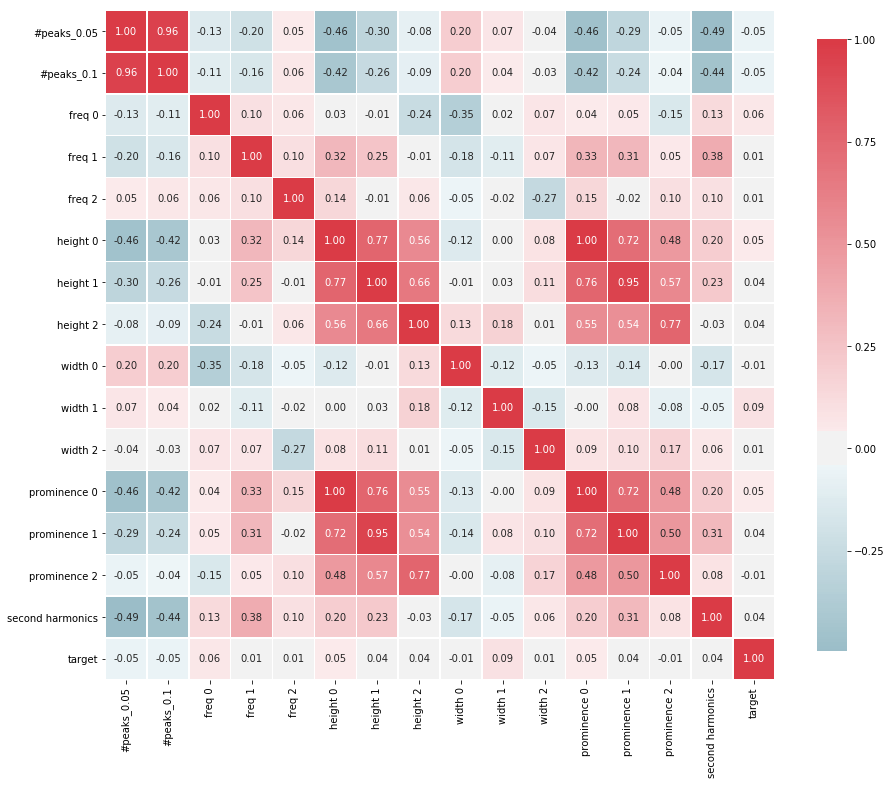

In [23]:
corr = data1.corr()
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=1.0, center=0, fmt='.2f', square=True, 
            linewidths=.5, annot=True, cbar_kws={"shrink": .75})

In [24]:
data1.describe()

,#peaks_0.05,#peaks_0.1,freq 0,freq 1,freq 2,height 0,height 1,height 2,width 0,width 1,width 2,prominence 0,prominence 1,prominence 2,second harmonics,target
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,15.867857,8.550000,9.788908,9.704934,7.054238,0.021123,0.011320,0.006797,1.838503,1.979611,1.957832,0.020902,0.009807,0.004806,0.536905,0.066667
std,14.176662,9.745993,4.149521,6.020587,5.824629,0.020189,0.011415,0.006026,1.506486,1.384393,1.476100,0.020143,0.011171,0.004730,0.498933,0.249592
min,1.000000,0.000000,0.463704,0.372574,0.248382,0.001761,0.000629,0.000489,1.059089,0.504297,0.501074,0.001615,0.000083,0.000007,0.000000,0.000000
25%,5.000000,2.000000,8.199597,5.999705,1.399931,0.007413,0.004304,0.003093,1.234834,1.256670,1.128981,0.007250,0.003091,0.001975,0.000000,0.000000
50%,11.000000,4.000000,10.059486,9.395833,5.690045,0.015029,0.007816,0.004923,1.360117,1.515111,1.477395,0.014761,0.006412,0.003296,1.000000,0.000000
75%,22.000000,10.000000,11.999410,16.299199,11.625000,0.026977,0.014323,0.008443,1.879003,2.266494,2.276480,0.026571,0.012154,0.005678,1.000000,0.000000
max,65.000000,47.000000,19.994781,19.994781,19.994781,0.164530,0.107162,0.052129,16.835515,19.589357,17.178994,0.164106,0.107147,0.045973,1.000000,1.000000


[ 57.4  72.8  79.6  85.3  89.1  91.9  94.1  95.8  96.7  97.4  98.   98.6
  99.   99.3  99.5  99.7  99.8  99.9 100. ]


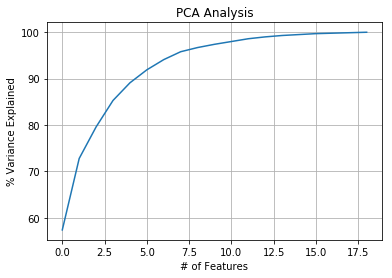

In [33]:
from sklearn.preprocessing import StandardScaler

X1 = data1.drop('target' , axis = 1).as_matrix()
y1 = data1.target.as_matrix()

X2 = data2.drop('target' , axis = 1).as_matrix()
y2 = data2.target.as_matrix()

scaler = StandardScaler()
scaler.fit_transform(X1)
scaler.fit_transform(X2)

from sklearn.decomposition import PCA

pca = PCA(n_components=19)
X1_pca = pca.fit_transform(X2) 
variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3) * 100)
print(variance)
# print(pca.components_)

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')

plt.plot(variance)
plt.grid()

## SVM training

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

C:\Users\ecath\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ecath\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [57]:
X = data.drop('target' , axis = 1)
y = data.target

scaler = StandardScaler()
scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666, stratify=y)

# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=666)
# cv = skf.split(X_train, y_train)

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 2, 5, 7, 10]}

clf = SVC(gamma='scale', class_weight='balanced')

optimizer = GridSearchCV(clf, parameters, cv=5, scoring='f1')
optimizer.fit(X_train, y_train) 

TypeError: must be real number, not str

In [50]:
optimizer.best_params_

{'C': 1, 'kernel': 'rbf'}

In [51]:
optimizer.best_score_

0.12916282015660902

In [52]:
best_model = optimizer.best_estimator_

Metrics to use: precision, recall, F1-score, auc roc curve, confusion matrix

In [53]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report, f1_score, accuracy_score

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy score = {}, F1-score = {}'.format(accuracy, f1))

Accuracy score = 0.8134920634920635, F1-score = 0.17543859649122806


In [54]:
confusion_matrix(y_test, y_pred)

array([[200,  35],
       [ 12,   5]], dtype=int64)